# NanoAODplus_analyzer

In [1]:
import time

from coffea import hist
from coffea.analysis_objects import JaggedCandidateArray
import coffea.processor as processor
from awkward import JaggedArray
import numpy as np
from pprint import pprint

from nanoAODplus_processor.EventSelectorProcessor import EventSelectorProcessor
from data.fileset import filesets
import yaml

import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

In [2]:
config_yaml = yaml.load(open("config/local.yaml", "r"), Loader=yaml.FullLoader)

if config_yaml['executor'] == 'futures_executor': 
    executor = processor.futures_executor
    
tstart = time.time()

files = {'Charmonium2017ULMINIAOD': filesets['Charmonium2017MINIAOD'][0:1], 
           'MuOnia2017ULMINIAOD': filesets['MuOnia2017MINIAOD'][0:1], 
           'DoubleMuon2017ULAOD': filesets['DoubleMuon2017AOD'][0:3]
          }

output = processor.run_uproot_job(files,
                                  treename='Events',
                                  processor_instance=EventSelectorProcessor(),
                                  #executor=processor.iterative_executor,
                                  #executor_args={'flatten': True},
                                  executor=executor,
                                  #executor_args={'workers': 6, 'flatten': True},
                                  executor_args={'workers': 8, 'nano': True, 'flatten': True},
                                  chunksize=config_yaml['chunksize'],
                                 )

elapsed = time.time() - tstart
print(output)


{'muon_pt': <Hist (dataset,pt) instance at 0x7fbef12239e8>, 'muon_eta': <Hist (dataset,eta) instance at 0x7fbecd137710>, 'muon_phi': <Hist (dataset,phi) instance at 0x7fbecd1377b8>, 'dimu_mass': <Hist (dataset,mass) instance at 0x7fbf2c27e9b0>, 'dimu_pt': <Hist (dataset,pt) instance at 0x7fbecd13bf60>, 'dimu_eta': <Hist (dataset,eta) instance at 0x7fbecd13b940>, 'dimu_phi': <Hist (dataset,phi) instance at 0x7fbecd13ba58>, 'D0_mass': <Hist (dataset,mass) instance at 0x7fbecd13be48>, 'D0_pt': <Hist (dataset,pt) instance at 0x7fbecd13b898>, 'D0_eta': <Hist (dataset,eta) instance at 0x7fbecd140f98>, 'D0_phi': <Hist (dataset,phi) instance at 0x7fbecd1404a8>, 'Muon_pt': column_accumulator(array([ 5.88572741,  3.11043429, 12.53602695, ...,  8.12360477,
        5.92909384,  4.41806364])), 'Muon_eta': column_accumulator(array([-1.34785795,  2.19104123, -1.35268629, ...,  0.80141658,
        1.89875627,  1.86810112])), 'Muon_phi': column_accumulator(array([ 2.07121944, -0.18010204,  2.1090405 ,

(0.0, 100.0)

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


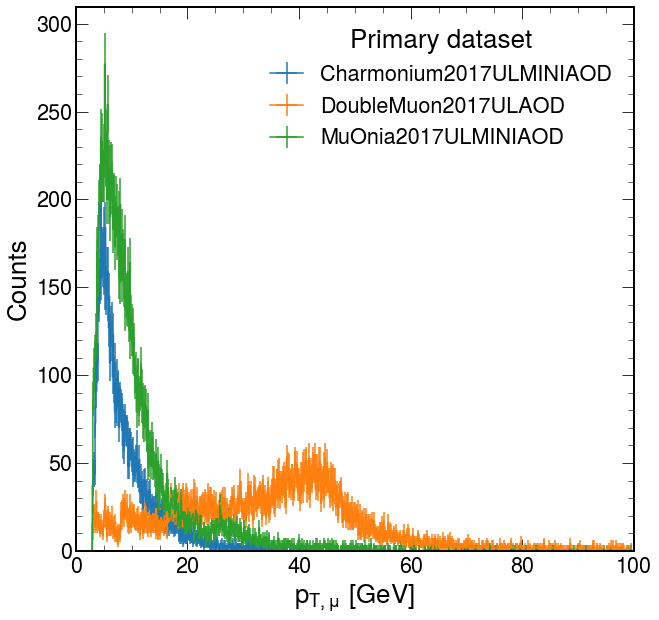

In [3]:
ax = hist.plot1d(output['muon_pt'], overlay='dataset')
ax.set_xlim(0,100)

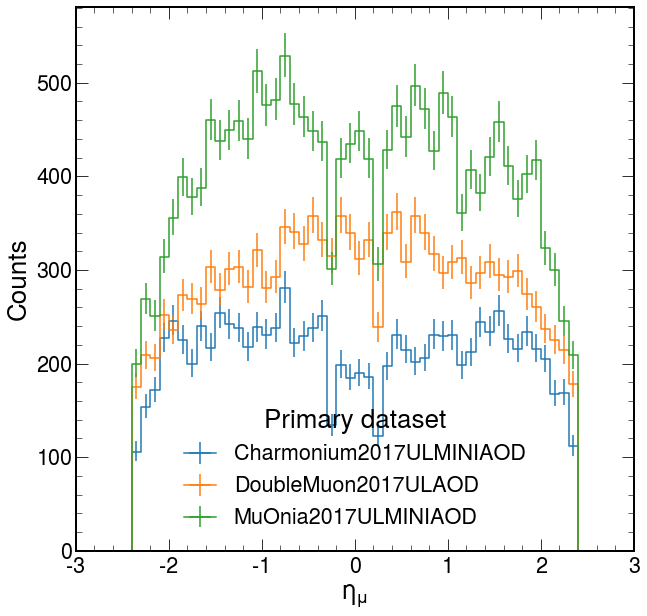

In [4]:
ax = hist.plot1d(output['muon_eta'], overlay='dataset')

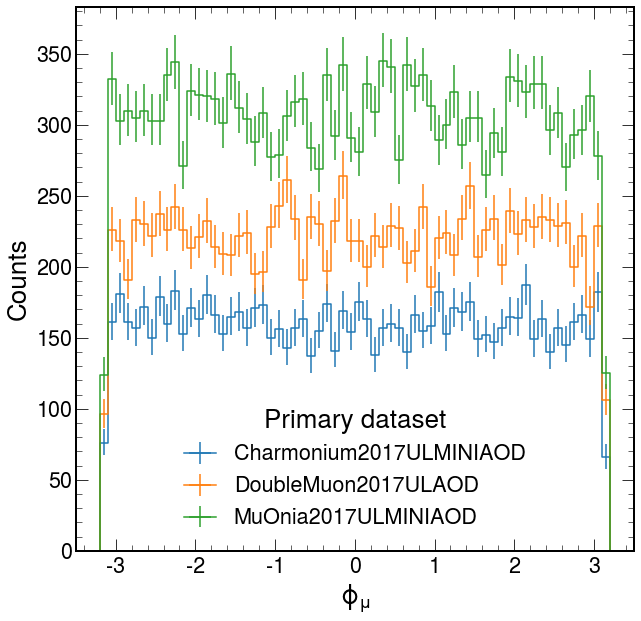

In [5]:
ax = hist.plot1d(output['muon_phi'], overlay='dataset')

(2.5, 12.0)

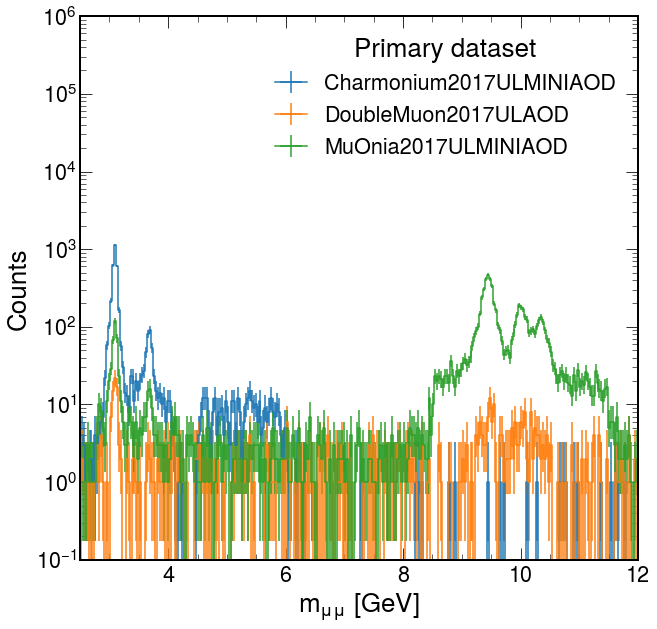

In [6]:
ax = hist.plot1d(output['dimu_mass'], overlay='dataset')
ax.set_yscale('log')
ax.set_ylim(0.1,1e6)
ax.set_xlim(2.5,12)

(0.0, 20.0)

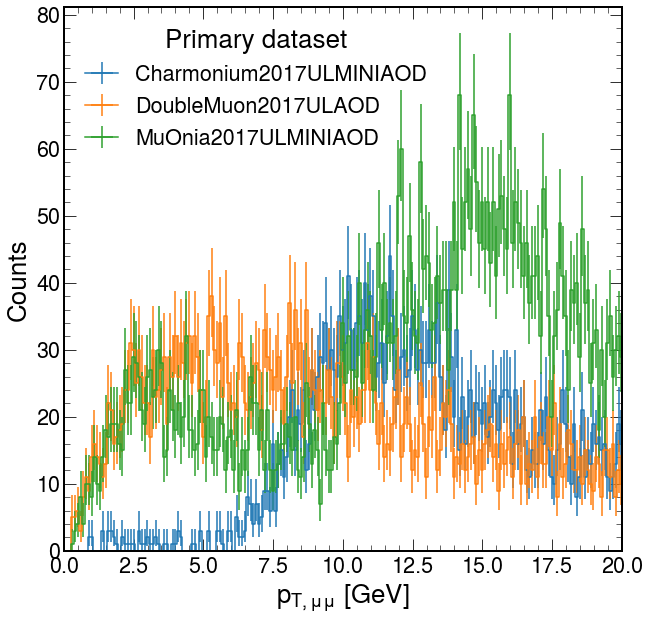

In [7]:
ax = hist.plot1d(output['dimu_pt'], overlay='dataset')
ax.set_xlim(0,20)

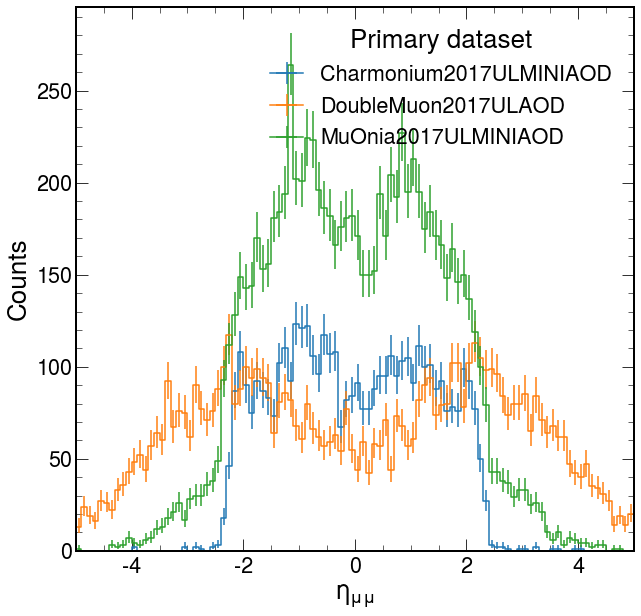

In [8]:
ax= hist.plot1d(output['dimu_eta'], overlay='dataset')

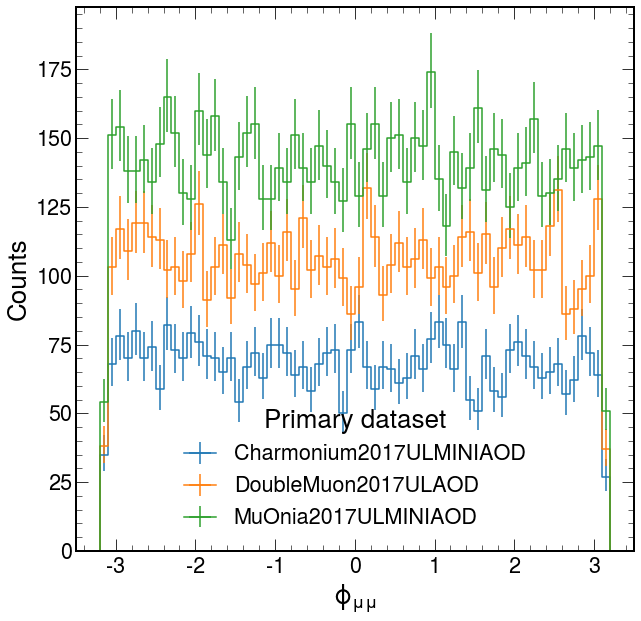

In [9]:
ax= hist.plot1d(output['dimu_phi'], overlay='dataset')

In [10]:
print("Events/s:", output['cutflow']['all events']/elapsed, "Time elapsed:", elapsed)
print(output['cutflow'])

Events/s: 3993.8358700402864 Time elapsed: 41.42533779144287
defaultdict(<class 'int'>, {'all events': 165446, 'all muons': 880003, 'all D0': 4098545, 'all Dstar': 4905609, 'soft muon': 611437, 'global muon': 349809, 'pt cut': 321044, 'eta cut': 320595, 'iso muon': 86591, 'valid vtx': 86585, 'two muons': 43431, 'D0 two muons': 465198, 'Dstar two muons': 538267, 'all dimuons': 22519, 'opposite charge': 21190, 'same vtx': 19878, 'D0 evt cut': 426195, 'Dstar evt cut': 491905})


(1.0, 2.5)

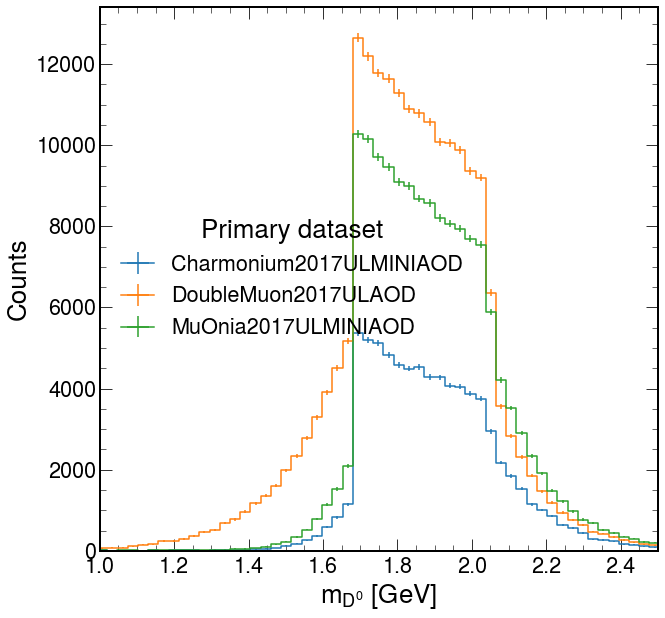

In [11]:
ax= hist.plot1d(output['D0_mass'], overlay='dataset')
ax.set_xlim(1.0,2.5)

(0.0, 10.0)

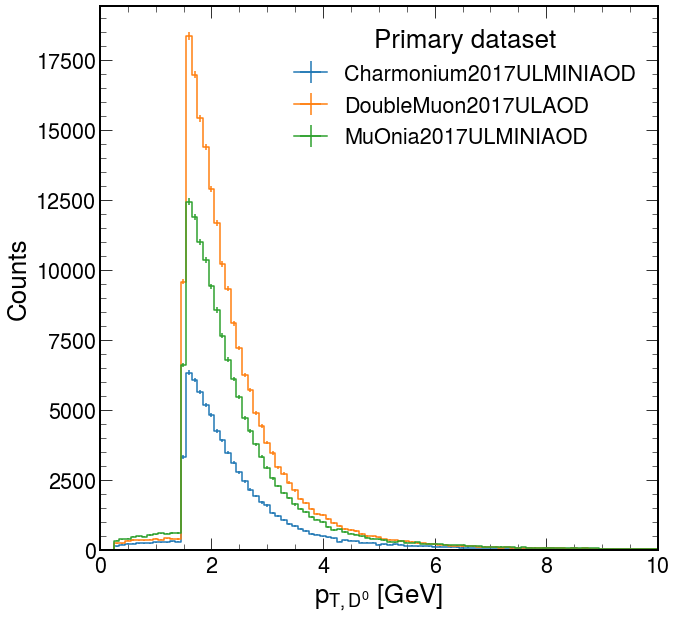

In [12]:
ax= hist.plot1d(output['D0_pt'], overlay='dataset')
ax.set_xlim(0,10)

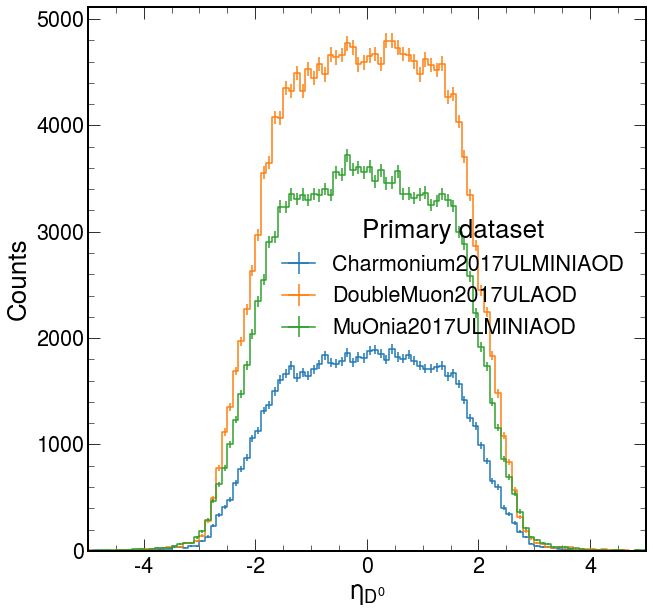

In [13]:
ax= hist.plot1d(output['D0_eta'], overlay='dataset')

In [ ]:
ax= hist.plot1d(output['D0_phi'], overlay='dataset')

In [15]:
output['Muon_pt']

column_accumulator(array([ 5.88572741,  3.11043429, 12.53602695, ...,  8.12360477,
        5.92909384,  4.41806364]))